In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('./datasets/HackerRank-Developer-Survey-2018-Numeric.csv')

/home/ambika/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,19,137,138,250) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Preparation

In [30]:
df.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,148.0,3,3,2,3,NaN,1,...,1,datacamp,1,1,NaN,2,NaN,#NULL!,NaN,2
1,6478031510,10/26/17 6:18,10/26/17 7:49,164.0,3,4,1,7,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
2,6464392829,10/19/17 10:44,10/19/17 10:56,98.0,2,2,2,3,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
3,6481629912,10/27/17 1:51,10/27/17 2:05,43.0,2,2,1,5,NaN,1,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,3
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,3,4,2,5,NaN,0,...,1,Blogs/articles by industry leaders,1,1,NaN,2,NaN,#NULL!,NaN,3


In [31]:
data = df[['CountryNumeric2', 'q2Age', 'q3Gender', 'q10Industry', 'q9CurrentRole' ]]

In [32]:
data.loc[data.q2Age == '#NULL!', 'q2Age'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
data.loc[data.q10Industry == '#NULL!', 'q10Industry'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
data.loc[data.q9CurrentRole == '#NULL!', 'q9CurrentRole'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
data.loc[data.q3Gender == '#NULL!', 'q3Gender'] = 4

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
data

,CountryNumeric2,q2Age,q3Gender,q10Industry,q9CurrentRole
0,148.0,3,2,0,18
1,164.0,4,1,5,10
2,98.0,2,2,4,18
3,43.0,2,1,0,18
4,NaN,4,2,14,2
5,167.0,5,1,14,0
6,167.0,6,1,5,19
7,167.0,3,1,4,0
8,154.0,3,1,14,0
9,78.0,3,1,13,18


In [37]:
gender_wise = data.groupby('q3Gender').count()

In [38]:
gender_wise

,CountryNumeric2,q2Age,q10Industry,q9CurrentRole
q3Gender,,,,
4,56,69,69,69
1,17458,20774,20774,20774
2,3496,4122,4122,4122
3,89,125,125,125


In [47]:
data.q3Gender = pd.to_numeric(data.q3Gender)
data

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,CountryNumeric2,q2Age,q3Gender,q10Industry,q9CurrentRole
0,148.0,3,2,0,18
1,164.0,4,1,5,10
2,98.0,2,2,4,18
3,43.0,2,1,0,18
4,NaN,4,2,14,2
5,167.0,5,1,14,0
6,167.0,6,1,5,19
7,167.0,3,1,4,0
8,154.0,3,1,14,0
9,78.0,3,1,13,18


# Data Visualization 

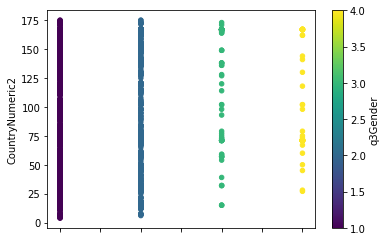

In [40]:
data.plot.scatter(x='q3Gender',y='CountryNumeric2',c='q3Gender',colormap='viridis',legend=True)


In [56]:
number=[]
count=0
for i, row in gender_wise.iterrows():
    if i is not 4:
        number.append([i, gender_wise.ix[i]['CountryNumeric2']])
    if i == 4:
        number.append([i, gender_wise.ix[0]['CountryNumeric2']])

/home/ambika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/ambika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [57]:
print(number)
dict={1:'male',2:'female',3:'non-binary',4:'others'}

[[4, 56], ['1', 17458], ['2', 3496], ['3', 89]]


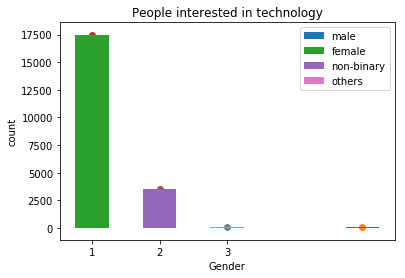

In [58]:
plt.title("People interested in technology")
plt.xlabel('Gender')
plt.ylabel('count')
for i in range(1,5):
    plt.bar(number[i-1][0],number[i-1][1],label=dict[i],width=0.5)
    plt.scatter(number[i-1][0],number[i-1][1])
    
    plt.legend()
    
# plt.arrow(number[0][0],number[0][1],number[1][0],number[1][1])
# plt.arrow(number[2][0],number[2][1],number[3][0],number[3][1])

In [61]:
industry=[]
count=0
for i, row in gender_wise.iterrows():
    
    if i is not 4:
        industry.append([i, gender_wise.ix[i]['q10Industry']])
    if i==4:  
        industry.append([i, gender_wise.ix[0]['q10Industry']])

/home/ambika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ambika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


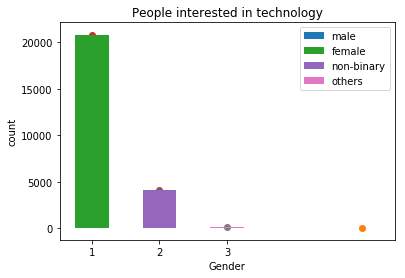

In [62]:
plt.title("People interested in technology")
plt.xlabel('Gender')
plt.ylabel('count')
for i in range(1,5):
    plt.bar(industry[i-1][0],industry[i-1][1],label=dict[i],width=0.5)
    plt.scatter(industry[i-1][0],industry[i-1][1])
#     for a,b in zip(industry[i-1][0],industry[i-1][1]):
#         plt.text(a,b,str(b))
    
#     plt.xticks(rotation=90)
    plt.legend()